# 4. Common Information

Author: Cheuk Ting Li  (https://staff.ie.cuhk.edu.hk/~ctli/)

<< Back to [table of contents](table_of_contents.ipynb)

In [26]:
import numpy
import matplotlib.pyplot as plt
from psitip import *
PsiOpts.setting(
    solver = "ortools.GLOP",    # Set linear programming solver
    str_style = "std",          # Conventional notations in output
    proof_note_color = "blue",  # Reasons in proofs are blue
    solve_display_reg = True,   # Display claims in solve commands
    proof_repeat_implicant = True, # Repeat the assumptions in proofs
    random_seed = 4321,         # Random seed for example searching
    figsize = (6,6),            # Default figure size for info diagrams
    istorch = True              # Enable pytorch
)

X, Y, Z, W, U, M, S = rv("X, Y, Z, W, U, M, S") # Declare random variables

### 3.1 - Mutual information
The mutual information $I(X;Y)$ measures how much information is shared between $X$ and $Y$. Its formula
$$I(X;Y)=H(X)+H(Y)-H(X,Y)$$
obviously parallels the inclusion-exclusion formula for finding the size of the intersection of two sets.

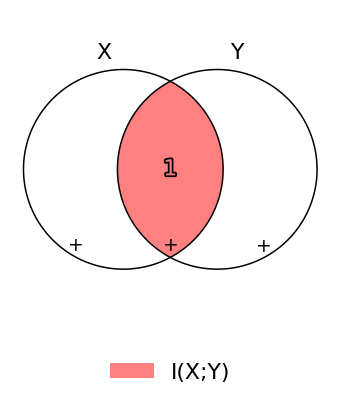

In [2]:
I(X&Y).venn()  # Info diagram of mutual information

One is tempted to treat $I(X;Y)$ as the "entropy of the intersection (or common part) of $X$ and $Y$". Nevertheless, this view is incorrect, and $I(X;Y)$ does not correspond to any random variable that can be regarded as the "common part". 

Intuitively, one expects the "common part" random variable $U$ between $X$ and $Y$ to satisfy the following two conditions:

  **A)** $U$ is a function of $X$, and is also a function of $Y$. This parallels the fact that the set intersection $C = A \cap B$ is both a subset of $A$ and a subset of $B$.

  **B)** $X$ and $Y$ are conditionally independent given $U$. This parallels the fact that the sets $A$ and $B$ do not intersect in any place other than $C = A\cap B$, i.e., $A \backslash C$ and $B \backslash C$ are disjoint.

While the above two conditions for sets can always be satisfied by $C = A \cap B$ (in fact these conditions precisely characterizes the set intersection operation), the corresponding conditions for random variables may not be simultaneously attainable, i.e., given random variables $X,Y$, there might not exist $U$ such that $H(U|X)=H(U|Y)=I(X;Y|U)=0$ (see Section 3.2). In case such $U$ exists, the random variables $X,Y$ are called **perfectly resolvable** [Prabhakaran-Prabhakaran 2014].

There are several notions of **common information**, which measures how much information is shared between random variables $X$ and $Y$, defined by imposing either Condition A or B. We will see that if we only keep Condition A, then we obtain the Gács-Körner common information [Gács-Körner 1973]. If we only keep Condition B, then we obtain either the Wyner's common information [Wyner 1975] or the common entropy [Kumar-Li-El Gamal 2014].

-----------------------

### 3.2 - Gács-Körner common information
The Gács-Körner common information [Gács-Körner 1973] between random variables $X,Y$ is given by
$$K(X;Y) = \sup_{p_{U|X,Y}: H(U|X)=H(U|Y)=0} H(U)$$
It finds the largest $H(U)$ where $U$ satisfies Condition A. It can also be given equivalently as [Gray-Wyner 1974]
$$K(X;Y) = \sup_{p_{U|X,Y}: I(U;X|Y)=I(U;Y|X)=0} I(U;X,Y)$$
Refer to "Alternative Characterization" section for the proof.

In [16]:
display(gacs_korner(X & Y) == gacs_korner(X & Y, mi=False).defn()) # Print definition
display(gacs_korner(X & Y) == gacs_korner(X & Y, mi=True).defn())  # Print alt. defn

gacs_korner(X&Y) == (( ( H(U|X) == 0 )
 &( H(U|Y) == 0 ) ).exists(U)).maximum(H(U)) 

gacs_korner(X&Y) == (( ( markov(U, Y, X) )
 &( markov(U, X, Y) ) ).exists(U)).maximum(I(U&X+Y)) 

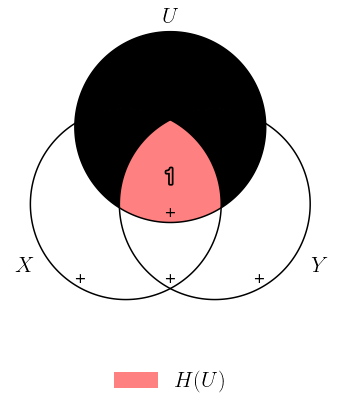

In [7]:
(~H(U|X) & ~H(U|Y)).venn(H(U))  # Info diagram of the definition

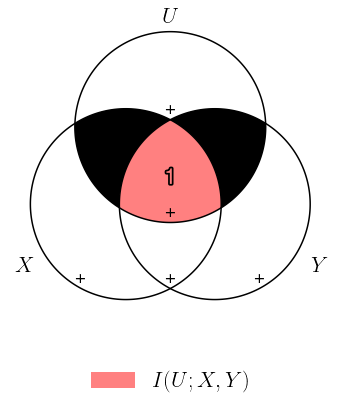

In [11]:
(~I(U&X|Y) & ~I(U&Y|X)).venn(I(U&X+Y))  # Info diagram of alt. defn

The random variable $U$ attaining $K(X;Y) = \sup_{p_{U|X,Y}: H(U|X)=H(U|Y)=0} H(U)$ is called the **Gács-Körner common part** of $X$ and $Y$. To find the Gács-Körner common part, consider the characteristic bipartite graph of $p_{X,Y}$, which is a bipartite graph with left vertex set $\mathcal{X}$ (the support of $X$) and right vertex set $\mathcal{Y}$ (the support of $Y$), and there is an edge $(x,y)$ iff $p_{X,Y}(x,y)>0$. Find the connected components of the graph, and assign a unique index to each connected component. The Gács-Körner common part $U$ is the index of the connected component that contains the edge $(X,Y)$. The Gács-Körner common part is unique up to relabeling.

We can see that $X,Y$ are perfectly resolvable iff their Gács-Körner common part $U$ satisfies $I(X;Y|U)=0$. Note that $K(X;Y)$ is often 0, and the Gács-Körner common part is often a constant random variable. For example, this occurs when $p_{X,Y}(x,y)>0$ for all $x,y$.

**Remark.** The Gács-Körner common information [Gács-Körner 1973] arises in the following common randomness generation setting. Let $(X_1,Y_1),\ldots,(X_n,Y_n) \sim p_{X,Y}$ i.i.d. Encoder 1 observes $X_1,\ldots,X_n$ and outputs $K_1\in\{1,\ldots,2^{nR}\}$. Encoder 2 observes $Y_1,\ldots,Y_n$ and outputs $K_2\in\{1,\ldots,2^{nR}\}$. We require that $K_1=K_2$ with probability tends to 1, and that the total variation distance between the distribution of $K_1$ and the uniform distribution over $\{1,\ldots,2^{nR}\}$ tends to 0, as $n\to \infty$. The maximum $R$ is given by $K(X;Y)$.

---------------

### 3.3 - Wyner's common information
Wyner's common information [Wyner 1975] between random variables $X,Y$ is given by
$$J(X;Y) = \inf_{p_{U|X,Y}: I(X;Y|U)=0} I(U;X,Y)$$
It finds the smallest $I(X;Y|U)$ where $U$ satisfies Condition B.

In [17]:
wyner_ci(X & Y) == wyner_ci(X & Y).defn()

wyner_ci(X&Y) == (( ( markov(X, U, Y) ) ).exists(U)).minimum(I(U&X+Y)) 

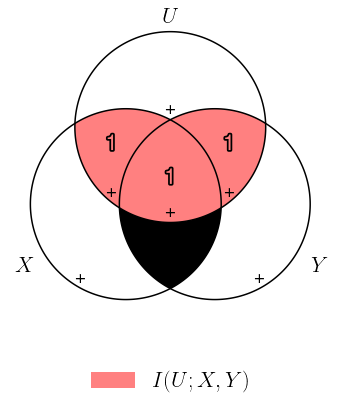

In [20]:
(~I(X&Y|U)).venn(U, X, Y, I(U & X,Y))  # Info diagram of the definition

**Remark.** Wyner's common information [Wyner 1975] arises in the following distributed simulation setting. Let $K \sim \mathrm{Unif}\{1,\ldots,2^{nR}\}$. Encoder 1 observes $K$ and outputs $X_1,\ldots,X_n$. Encoder 2 observes $K$ and outputs $Y_1,\ldots,Y_n$. We require that the total variation distance between the joint distribution of $(X_1,Y_1),\ldots,(X_n,Y_n)$ and $p_{X,Y}^n$ (the distribution of $n$ independent copies of $(X,Y) \sim p_{X,Y}$) tends to 0 as $n\to \infty$. The minimum $R$ is given by $J(X;Y)$.

---------------

### 3.4 - Common entropy
The common entropy [Kumar-Li-El Gamal 2014] between random variables $X,Y$ is given by
$$G(X;Y) = \inf_{p_{U|X,Y}: I(X;Y|U)=0} H(U)$$
It finds the smallest $H(U)$ where $U$ satisfies Condition B.

In [18]:
exact_ci(X & Y) == exact_ci(X & Y).defn()

exact_ci(X&Y) == (( ( markov(X, U, Y) ) ).exists(U)).minimum(H(U)) 

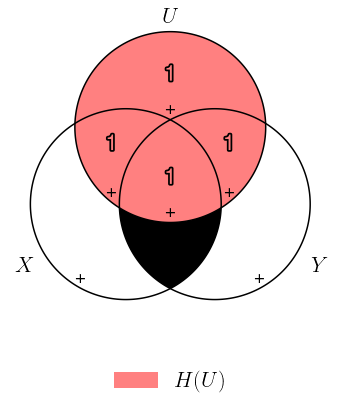

In [21]:
(~I(X&Y|U)).venn(U, X, Y, H(U))  # Info diagram of the definition

**Remark.** The common entropy [Kumar-Li-El Gamal 2014] arises in the following one-shot distributed simulation setting. Let $K \sim p_K$. Encoder 1 observes $K$ and outputs $X$. Encoder 2 observes $K$ and outputs $Y$. We require that $(X,Y) \sim p_{X,Y}$. The minimum $H(K)$ is given by $G(X;Y)$.

We can see there are multiple ways of defining the concept of "common information", and none of them is a one-size-fits-all definition. The fact that there is no canonical way of defining the "intersection of random variables" shows how differently random variables behave compared to sets.



------

### 3.5 - Comparisons

We have
$$0 \le K(X;Y) \le I(X;Y) \le J(X;Y) \le G(X;Y) \le \min\{H(X),H(Y)\}$$

In [27]:
# Automatically discover inequalities among quantities
res = universe().discover([X, Y, 
                     gacs_korner(X & Y), 
                     wyner_ci(X & Y), 
                     exact_ci(X & Y)])
res

( ( exact_ci(X&Y) <= H(X) )
 &( exact_ci(X&Y) <= H(Y) )
 &( I(X&Y) <= wyner_ci(X&Y) )
 &( gacs_korner(X&Y) >= 0 )
 &( gacs_korner(X&Y) <= I(X&Y) )
 &( wyner_ci(X&Y) <= exact_ci(X&Y) ) )

Some inequalities here can be proved using the conventional approach of proving linear information inequalities. For example, to show $K(X;Y) \le I(X;Y)$, we only need to show the implication $H(U|X)=H(U|Y)=0$ $\Rightarrow$ $H(U) \le I(X;Y)$. It follows directly from the information diagram.

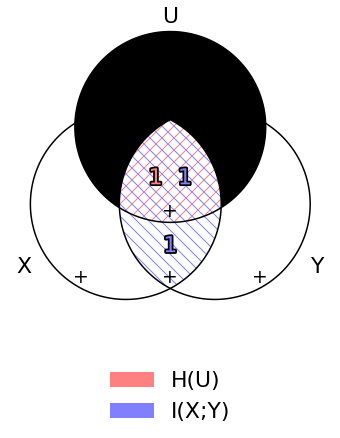

In [14]:
(~H(U|X) & ~H(U|Y)).venn(H(U), I(X&Y), style="hatch")

To show $J(X;Y) \ge I(X;Y)$, we need to show the implication $I(X;Y|U)=0$ $\Rightarrow$ $I(U;X,Y) \le I(X;Y)$. It follows directly from the information diagram.

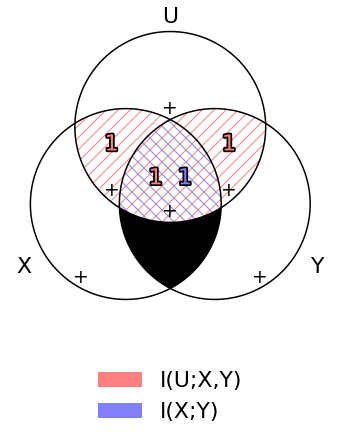

In [16]:
(~I(X&Y|U)).venn(U, X, Y, I(U & X,Y), I(X&Y), style="hatch")

To prove $G(X;Y) \le H(X)$, we show that there exists $U$ such that $I(X;Y|U)=0$ and $H(U) \le H(X)$. We can simply take $U=X$. This technique of finding the choice of a random variables as a combination of existing random variables is called "identification of auxiliary random variables", and will be useful later in proving converse results in network information theory.

While $J(X;Y) \le G(X;Y)$ follows directly from the definition, we can also frame it as an identification of auxiliary random variable. It is equivalent to proving the implication $I(X;Y|U_1)=0$ $\Rightarrow$ $\exists U_2:\, I(X;Y|U_2)=0, \, I(U_2;X,Y) \le H(U_1)$. This follows from identifying $U_2=U_1$.

We will ask the program to emit the proofs of all inequalities in the previous "discover" result.

In [28]:
for ineq in res:
    display(ineq.proof())
    print("------------------")

------------------


------------------


------------------


------------------


------------------


------------------


------------

**The following sections discuss various properties of these definitions of common information. Readers not particularly interested in them may skip to the next chapter.**

------------

------

### 3.6 - Alternative Characterization of Gács-Körner Common Information

We now prove that the two characterizations are equivalent:
$$K(X;Y) = \sup_{p_{U|X,Y}: H(U|X)=H(U|Y)=0} H(U) = \sup_{p_{U|X,Y}: I(U;X|Y)=I(U;Y|X)=0} I(U;X,Y)$$
We first prove the "$\le$" direction.

In [29]:
(gacs_korner(X & Y, mi = False).defn()
     <= gacs_korner(X & Y, mi = True).defn()).proof()

For the "$\ge$" direction, we require the double Markov property [Csiszar-Korner 2011], which states that for any random variables $X,Y,Z$ such that $I(Z;X|Y)=I(Z;Y|X)=0$, there exists a random variable $W$ with $H(W|X)=H(W|Y)=I(Z;X,Y|W)=0$.

In [21]:
dblmarkov()

(( ( markov(DZ, DX, DY) )
  &( markov(DX, DY, DZ) ) )
>> ( ( H(DW|DX) == 0 )
    &( H(DW|DY) == 0 )
    &( markov(DX+DY, DW, DZ) ) ).exists(DW)).forall(DX+DY+DZ)

In [30]:
# Prove the ">=" direction using double Markov property
with dblmarkov().assumed():
    display((gacs_korner(X & Y, mi = False).defn()
         >= gacs_korner(X & Y, mi = True).defn()).proof())

------

### 3.6 - Data Processing Inequality

Recall that the mutual information satisfies the data processing inequality: if $X \to Y \to Z$ form a Markov chain, then $I(X;Y) \ge I(X;Z)$. This also holds for the common informations discussed.

In [31]:
r = markov(X, Y, Z)  # X -> Y -> Z forms a Markov chain
(r >> (gacs_korner(X & Y) >= gacs_korner(X & Z))).proof()

In [32]:
(r >> (wyner_ci(X & Y) >= wyner_ci(X & Z))).proof()

In [33]:
(r >> (exact_ci(X & Y) >= exact_ci(X & Z))).proof()

------

### 3.7 - Tensorization / Additivity

In [34]:
r = indep(X + Y, Z + W)  # (X,Y) is independent of (Z,W)

# Gács-Körner common information is additive
(r >> (gacs_korner(X & Y) + gacs_korner(Z & W) >= gacs_korner(X+Z & Y+W))).proof()

In [35]:
(r >> (gacs_korner(X & Y) + gacs_korner(Z & W) <= gacs_korner(X+Z & Y+W))).proof()

In [36]:
# Wyner's common information is additive
(r >> (wyner_ci(X & Y) + wyner_ci(Z & W) >= wyner_ci(X+Z & Y+W))).proof()

In [37]:
(r >> (wyner_ci(X & Y) + wyner_ci(Z & W) <= wyner_ci(X+Z & Y+W))).proof()

In [38]:
# Common entropy is only subadditive
(r >> (exact_ci(X & Y) + exact_ci(Z & W) >= exact_ci(X+Z & Y+W))).proof()

In [39]:
(r >> (exact_ci(X & Y) + exact_ci(Z & W) <= exact_ci(X+Z & Y+W))).solve(display_reg = True)

((  indep(X+Y, Z+W)  )
>> (  exact_ci(X&Y)+exact_ci(Z&W) <= exact_ci(X+Z&Y+W)  )) is Unknown

exact common information [Kumar-Li-El Gamal 2014] ????????????????????????????????????

------

### Condition for Zero

For Gács-Körner, note that $X,Y$ being independent is a sufficient but not necessary condition for $K(X;Y)=0$. For example, if all entries in the joint pmf $p_{X,Y}(x,y)$ are positive, then $K(X;Y)=0$. In this sense, $K(X;Y)$ is not exactly a "measure of dependence".

In [25]:
# "Gács-Körner = 0 iff X indep. of Y" is False
((gacs_korner(X & Y) == 0) == indep(X, Y)).solve()

(
  (  (  indep(X, Y)  )
  >> (  gacs_korner(X&Y) == 0  ))
 &
  (  (  gacs_korner(X&Y) == 0  )
  >> (  indep(X, Y)  ))
) is Unknown

For Wyner's common information, we have $J(X;Y)=0$ iff $X,Y$ are independent.

In [26]:
((wyner_ci(X & Y) == 0) == indep(X, Y)).solve()

(
  (  (  indep(X, Y)  )
  >> (  wyner_ci(X&Y) == 0  ))
 &
  (  (  wyner_ci(X&Y) == 0  )
  >> (  indep(X, Y)  ))
) is True
CompArray(
[[U, U_1+X+Y],
 [U, X+Y],
 [U, rv()],
 [U, U_1]])

For common entropy, we also have $G(X;Y)=0$ iff $X,Y$ are independent.

In [27]:
# Common entropy = 0 iff X indep. of Y
((exact_ci(X & Y) == 0) == indep(X, Y)).solve()

(
  (  (  indep(X, Y)  )
  >> (  exact_ci(X&Y) == 0  ))
 &
  (  (  exact_ci(X&Y) == 0  )
  >> (  indep(X, Y)  ))
) is True
CompArray(
[[U, U_1+X+Y],
 [U, X+Y],
 [U, rv()],
 [U, U_1]])

------

### Perfectly Resolvable Case

In [28]:
# X, Y are perfectly resolvable with common part W [Prabhakaran-Prabhakaran 2014]
r = (H(W | X) == 0) & (H(W | Y) == 0) & markov(X, W, Y)
r

( ( H(W|X) == 0 )
 &( H(W|Y) == 0 )
 &( markov(X, W, Y) ) )

In [24]:
# If perfectly resolvable, then Gács-Körner = H(W)
(r >> (gacs_korner(X & Y) == H(W))).solve(display_reg = True)

(( ( H(W|X) == 0 )
  &( H(W|Y) == 0 )
  &( markov(X, W, Y) ) )
>> (  gacs_korner(X&Y) == H(W)  )) is True
CompArray(
[[U, U_1+W]])

In [25]:
# If perfectly resolvable, then Wyner = H(W)
(r >> (wyner_ci(X & Y) == H(W))).solve(display_reg = True)

(( ( H(W|X) == 0 )
  &( H(W|Y) == 0 )
  &( markov(X, W, Y) ) )
>> (  wyner_ci(X&Y) == H(W)  )) is True
CompArray(
[[U, W]])

In [26]:
# If perfectly resolvable, then Common entropy = H(W)
(r >> (exact_ci(X & Y) == H(W))).solve(display_reg = True)

(( ( H(W|X) == 0 )
  &( H(W|Y) == 0 )
  &( markov(X, W, Y) ) )
>> (  exact_ci(X&Y) == H(W)  )) is True
CompArray(
[[U, W]])

------

### Numerical Evaluation for Binary Symmetric Source

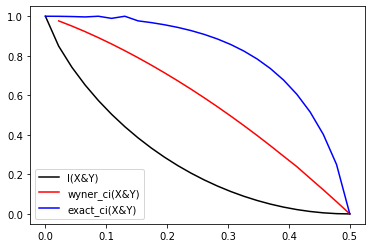

In [27]:
# Switch to basin-hopping for nonconvex optimization
# PsiOpts.setting(opt_basinhopping = True)

# PsiOpts.setting(opt_aux_card = 2)    # Default cardinality for auxiliary
# PsiOpts.setting(opt_num_points = 24) # Number of initial points to try
# PsiOpts.setting(opt_num_hop = 4)     # Number of hops
# PsiOpts.setting(opt_num_iter = 8)    # Number of iterations per hop

X, Y = rv("X, Y").set_card(2)     # X,Y are binary RVs (cardinality = 2)
P = ConcModel()                   # Underlying distribution of RVs
P[X] = [0.5, 0.5]                 # X is a fair bit

ts = numpy.linspace(0.0, 0.5, 24)
ms, js, gs = [], [], []
for t in ts:
    P[Y | X] = [[1-t, t], [t, 1-t]]  # P(Y|X) is BSC(t)
    ms.append(P[I(X & Y)])           # Evaluate mutual information
    js.append(P[wyner_ci(X & Y)])    # Wyner's common information
    gs.append(P[exact_ci(X & Y)])    # Common entropy

# Plot the quantities against t
plt.figure()
plt.plot(ts, ms, 'k', label = str(I(X & Y)))
plt.plot(ts, js, 'r', label = str(wyner_ci(X & Y)))
plt.plot(ts, gs, 'b', label = str(exact_ci(X & Y)))
plt.legend()
plt.show()

### References
- P. Gács and J. Körner, "Common information is far less than mutual information," Problems Control Inf. Theory, vol. 2, no. 2, pp. 149–162, 1973.
- A. D. Wyner, "The common information of two dependent random variables," IEEE Trans. Inf. Theory, vol. IT-21, no. 2, pp. 163-179, Mar. 1975.
- G. R. Kumar, C. T. Li, and A. El Gamal, "Exact common information," in Proc. IEEE Symp. Info. Theory. IEEE, 2014, pp. 161-165.
- R. M. Gray and A. D. Wyner, "Source coding for a simple network," Bell Syst. Tech. J., vol. 53, no. 9, pp. 1681–1721, 1974.
- I. Csiszár and J. Körner, "Information theory: coding theorems for discrete memoryless systems," Cambridge University Press, 2011.
- C. T. Li and A. El Gamal, "Extended Gray–Wyner system with complementary causal side information," IEEE Trans. Inf. Theory, vol. 64, no. 8, pp. 5862–5878, 2017
- V. M. Prabhakaran and M. M. Prabhakaran, "Assisted common information with an application to secure two-party sampling," IEEE Transactions on Information Theory, vol. 60, no. 6, pp. 3413-3434, 2014.
